# Exercise 4A - Pareto Fronts
Introduced during Tutorial 4

In exercise 4A we will begin by using a simple <span style="color:orange;"> synthetic dataset </span>. In Exercise 4B we generate a more complex synthetic dataset which will involve more detailed analysis. In Exercise 4C serves as template for your Coursework Question 4. You will you use some pre-compiled EnergyPlus data to build the Pareto Front.

In this exercise, students will be guided on how to determine the min-min pareto front using two algorithms : an inefficient, but intuitive algorithm based on the manual method shown in class, and an efficient method implented in the *paretoset* package.

### Colour codes

<span style="color:orange;"> Orange text is for emphasis and definitions </span>

<span style="color:lime;"> Green text is for tasks to be completed by the student </span>

<span style="color:dodgerblue;"> Blue text is for Python coding tricks and references </span>

## Load all the necessary Python packages
All packages should work with Conda environment if installed on your machine. Otherwise all necessary packages can be installed in a virtual environment (.venv) in VS Code using: Ctrl+Shift+P > Python: Create Environment > Venv > Python 3.12.x > requirements.txt

<span style="color:orange;"> NOTE: that we are using the **paretoset** package will be used. You may need to install this package using pip.</span>

In [10]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from paretoset import paretoset


In [11]:
!pip install paretoset

## 1. Creating a synthetic dataset

We will begin by generating a sample of *n* random points based on the equation for an ellipse.

$$
\
(x, y) = (a cos(\theta), b (sin(\theta)))
\
$$

Where,

$$
\
\pi > \theta > \frac{3\pi}{2} \\

1 > a > 2 \\

0.5 > b > 1
\
$$

Here we are restricting points to the lower left quadrant of the ellipse.

### 1.1 Enter the general parameters for this exercise
<span style="color:limegreen;"> Select the number of random samples and the random seed you want to use </span>

In [12]:
n = 50
random_seed = 27

### 1.2 Set up a fixed random number generator with a random seed
<span style="color:dodgerblue;"> Setting up a random number generator (RNG) object with a fixed random seed is best practice, especially if you want to ensure consistency on each run. In this step we create a *generator* instance of Numpy's random number generator with the desired input seed.</span>

In [ ]:
rng = np.random.default_rng(random_seed)

### 1.3 Generate the data points
Using the rng create *n* (x, y) coordinate pairs based on the equation of the ellipse.

In [14]:
theta = rng.uniform(np.pi, 3/2 * np.pi, n)
a = rng.uniform(1, 2, n)
b = rng.uniform(0.5, 1, n)

x = a * np.cos(theta) + 2 # Add 2 and 1 to ensure all data points are positive
y = b * np.sin(theta) + 1

print ("The first ten points:")
for i in range (10):
    print (f"{i} ({x[i]:.4f}, {y[i]:.4f})")

The first ten points:
0 (1.4787, 0.3511)
1 (1.0696, 0.7073)
2 (0.3837, 0.8133)
3 (0.3230, 0.5818)
4 (1.8900, 0.0611)
5 (1.5314, 0.3152)
6 (0.0947, 0.9863)
7 (0.3004, 0.7606)
8 (1.0189, 0.5993)
9 (1.8630, 0.2317)


### 1.4 Plot the graph

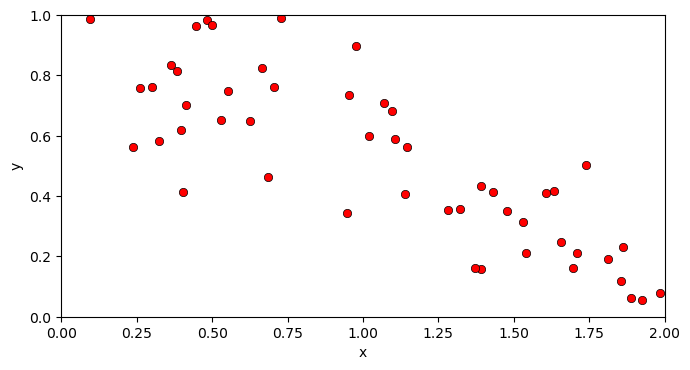

In [15]:
fig, ax = plt.subplots()
ax.scatter (x, y, color = "red", linewidths = 0.5, edgecolor = "black")

ax.set_xlim(0, 2)
ax.set_ylim(0, 1)

ax.set_xlabel ("x")
ax.set_ylabel ("y")

ax.set_aspect("equal", "box")
fig.set_figwidth(7)
fig.set_figheight(5)
fig.tight_layout()


## 2. Determine the Pareto Front
### 2.1 The Inefficient Way
Determine the Pareto Front in a for loop using the same methodology we did using the manual example.
* Loop through each coordinate pair (*i*) and compare it to every other coordinate pair (*j*)
* If both of *i*'s x and y coordinates are greater than *j*'s than that point is dominated 
    * Append its index to the list and we can break from the for loop.

In [16]:
# Initialize a list for dominated points
dominated = [] # Empty list to be appended to

for i in range(n):
    for j in range (n):
        if x[i] > x[j] and y[i] > y[j]:
            print (f"{i} is dominated by {j}.")
            dominated.append(i)
            break

# Get the non-dominated points by using Python's sets function
nonDominated = list(set(range(n)) - set(dominated))

print ("The dominated points are:")
print (dominated)

print ("The non-dominated points on the Pareto Front are:")
print (nonDominated)

0 is dominated by 24.
1 is dominated by 3.
2 is dominated by 3.
3 is dominated by 44.
5 is dominated by 24.
7 is dominated by 35.
8 is dominated by 3.
9 is dominated by 13.
10 is dominated by 3.
11 is dominated by 2.
12 is dominated by 0.
13 is dominated by 24.
14 is dominated by 3.
15 is dominated by 3.
16 is dominated by 19.
17 is dominated by 3.
18 is dominated by 24.
19 is dominated by 39.
20 is dominated by 19.
21 is dominated by 18.
22 is dominated by 2.
23 is dominated by 3.
25 is dominated by 39.
26 is dominated by 3.
27 is dominated by 0.
29 is dominated by 2.
30 is dominated by 42.
31 is dominated by 3.
32 is dominated by 24.
33 is dominated by 2.
34 is dominated by 0.
35 is dominated by 44.
36 is dominated by 2.
37 is dominated by 3.
38 is dominated by 3.
40 is dominated by 2.
41 is dominated by 4.
45 is dominated by 19.
46 is dominated by 18.
48 is dominated by 25.
49 is dominated by 3.
The dominated points are:
[0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1

### 2.2 The Efficient way
While this method is simple (7 lines of code), it is inefficient (0<sup>2</sup>), and not very robust (what if want to test max-max pareto front or wanted to perform a trivariate pareto front).

The Python package *paretoset* [Link](https://pypi.org/project/paretoset/) has more efficient and more robust implementation of this algorithm taking advantage of Numpy arrays. The package is relatively straightforward to use provided that you give it the columns of the dataframe and identify the *senses* of each column - whether you want to the analysis on the min or max of those columns.

To use the paretoset function we must place the data into a dataframe

In [17]:
df = pd.DataFrame({"x" : x, "y" : y})

The paretoset function has the *sense* argument which tells us whether we want to determine the paretofront for the min-min, max-max, or min-max of the two variables.

We will begin by doing the min-min pareto front.

In [18]:
paretoFront = paretoset(df, sense = ["min", "min"])

# Return the non-dominated values in a list and print
paretoFront_nonDominated = list(df[paretoFront].index)

print ("The non-dominated points on the Pareto Front are:")
print (paretoFront_nonDominated)


The non-dominated points on the Pareto Front are:
[4, 6, 24, 28, 39, 42, 43, 44, 47]


Do a quick check that both methods found the same list of points.

In [19]:
print(set(nonDominated) == set(paretoFront_nonDominated))

True


## 3. Visualization
To visualise the paretofront we can use scatterplots using different markers for those on the pareto front and those which are not.

This can be done by using masks to create two separate dataframes and then plotting those two scatter points separately.

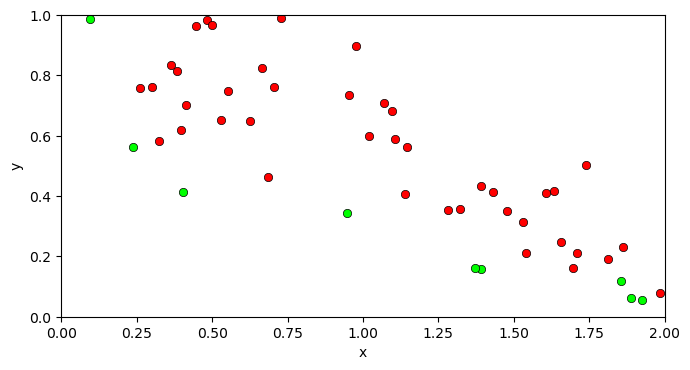

In [20]:
# Create separate dataframes for those on the Pareto Front and those which are not.
# Those on the Pareto Front will be plotted separately with colour emphasized
onPareto = df[paretoFront]

offPareto = df[~paretoFront] # Note the tilde denotes 'not' 

fig, ax = plt.subplots()
# First the points off of the Pareto front
ax.scatter(offPareto.x, offPareto.y, c = "red",  linewidths = 0.5, edgecolors = "black")
# Second those on the Pareto Front with colour green for emphasis
ax.scatter(onPareto.x, onPareto.y,  c = "lime",  linewidths = 0.5, edgecolors = "black")

ax.set_xlim(0, 2)
ax.set_ylim(0, 1)

ax.set_xlabel ("x")
ax.set_ylabel ("y")

ax.set_aspect("equal", "box")
fig.set_figwidth(7)
fig.set_figheight(5)
fig.tight_layout()

plt.show()

## 4. Determining the max-max pareto front

<span style="color:limegreen;"> On your own, find the max-max paretofront from the data points already generated and plot the results. <b> Before you begin, which points do you expect to be on the pareto front?</span>

### 4.1 Find the pareto front

In [23]:
# Add code here
paretoFront = paretoset(df, sense = ["max", "max"])

# Return the non-dominated values in a list and print
paretoFront_nonDominated = list(df[paretoFront].index)

print ("The non-dominated points on the Pareto Front are:")
print (paretoFront_nonDominated)


The non-dominated points on the Pareto Front are:
[1, 9, 15, 20, 27, 36, 38, 40, 41]


### 4.2 Visualization

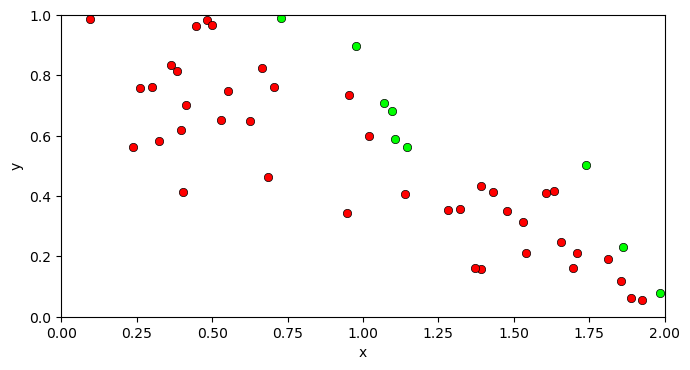

In [24]:
# Add code here
# Create separate dataframes for those on the Pareto Front and those which are not.
# Those on the Pareto Front will be plotted separately with colour emphasized
onPareto = df[paretoFront]

offPareto = df[~paretoFront] # Note the tilde denotes 'not' 

fig, ax = plt.subplots()
# First the points off of the Pareto front
ax.scatter(offPareto.x, offPareto.y, c = "red",  linewidths = 0.5, edgecolors = "black")
# Second those on the Pareto Front with colour green for emphasis
ax.scatter(onPareto.x, onPareto.y,  c = "lime",  linewidths = 0.5, edgecolors = "black")

ax.set_xlim(0, 2)
ax.set_ylim(0, 1)

ax.set_xlabel ("x")
ax.set_ylabel ("y")

ax.set_aspect("equal", "box")
fig.set_figwidth(7)
fig.set_figheight(5)
fig.tight_layout()

plt.show()